<a href="https://colab.research.google.com/github/Abishek0411/Computer-Vision-Projects/blob/main/CV_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 5 — Applications: Face Detection, Face Recognition (Eigenfaces), Foreground-Background Segmentation

*   Face detection with OpenCV Haar / DNN face detector
*   Simple face recognition pipeline using PCA (Eigenfaces) on small dataset (you can create a few images for 2-3 persons)
*   Foreground-background separation and simple person detection using pre-trained MobileNet-SSD (or Haar for simplicity)





In [1]:
# !pip -q install opencv-python-headless==4.7.0.72 scikit-image matplotlib numpy scipy scikit-learn
import cv2, sys, os, numpy as np, matplotlib.pyplot as plt
from skimage import filters, feature, morphology, measure, color, io
plt.rcParams['figure.figsize'] = (10,6)

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


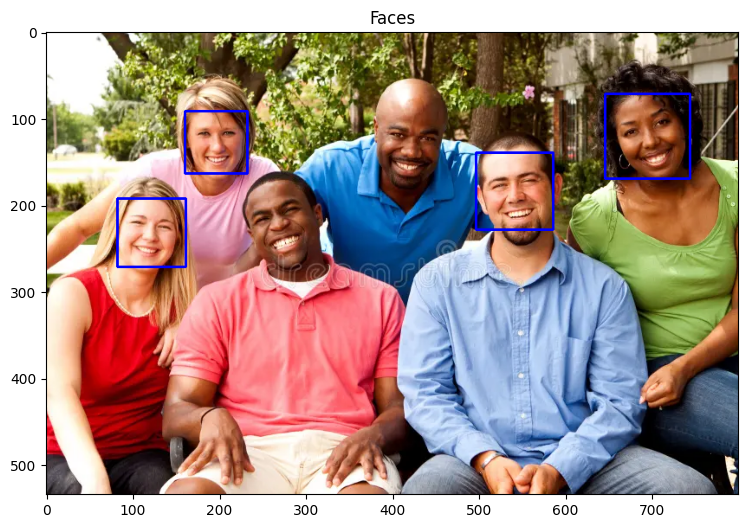

In [7]:
# Face detection (Haar)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread('/content/drive/MyDrive/Computer_Vision_Project/data/group.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)); plt.title('Faces')

# Simple Eigenfaces (PCA) demo (use small dataset folder per person)
import os, glob
from sklearn.decomposition import PCA
imgs = []
labels = []
for label, person in enumerate(['person1','person2']):
    files = glob.glob(f'/content/drive/MyDrive/Computer_Vision_Project/data/faces/{person}/*.jpg')
    for f in files:
        im = cv2.imread(f, cv2.IMREAD_GRAYSCALE)
        im = cv2.resize(im, (100,100))
        imgs.append(im.flatten()); labels.append(label)
X = np.array(imgs)
pca = PCA(n_components=1).fit(X)
proj = pca.transform(X)
# Simple nearest neighbour classifier in projected space
